<a href="https://colab.research.google.com/github/John-Kilroy/Woah/blob/master/3_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


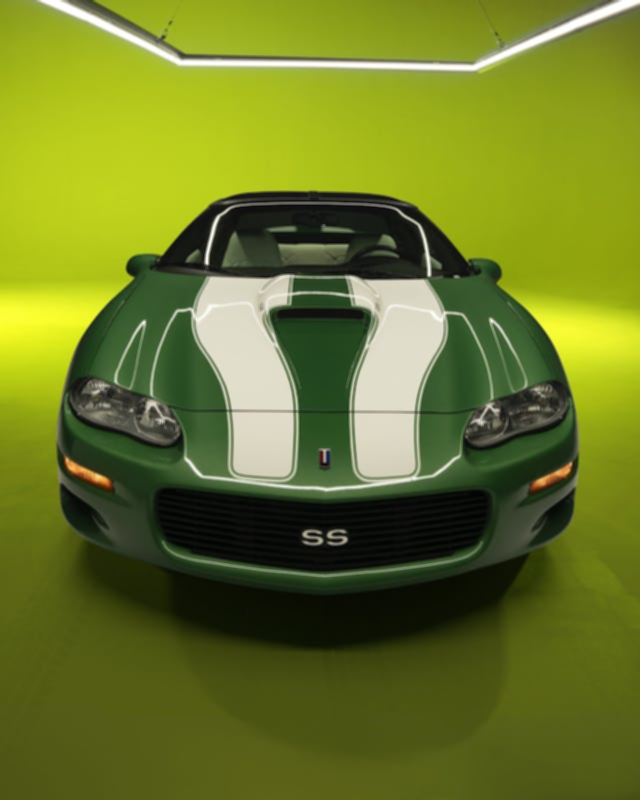

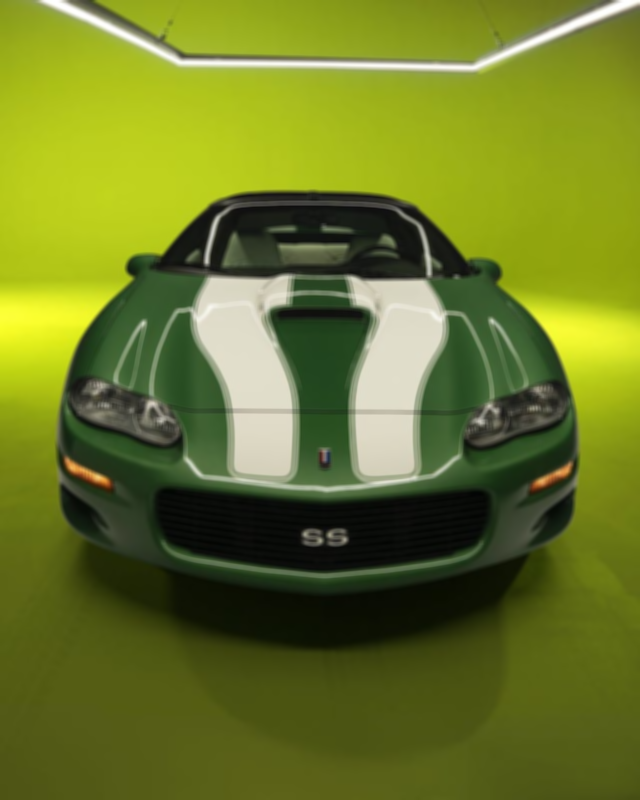

In [14]:
from skimage import io
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

yourUrl = 'https://hagerty-media-prod.imgix.net/2023/11/Shot13_FourthGen_Front_Main_014-1_v2-scaled.jpg?auto=format%2Ccompress&fit=crop&ixlib=php-3.3.0&max-h=800&max-w=640'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#prepare the 3x3 shaped filter
k1 = np.ones((3, 3))

#prepare the 5x5 shaped filter
k2 = np.ones((5, 5))

# Normalize the kernels if needed. 3x3 filter has 1/9 factor, 5x5 has a 1/25 factor
k1.fill(1/9)  # Fill with 1/9 for normalization
k2.fill(1/25)  # Fill with 1/25 for normalization

# apply filter
final_frame = cv2.filter2D(image, -1, k1)
final_frame2 = cv2.filter2D(image, -1, k2)

#make sure you are the right data type and values. You can use histogram to check it
# 0-255 if uint8
# 0-1 if float

# visualize
cv2_imshow(final_frame)
cv2_imshow(final_frame2)


The difference between the 3x3 and 5x5 box filters is that they each blur the  image more progressively. The 3x3 filter blurs the original image and the 5x5 box filter blurs the image even more.

3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





Kernel a (σ² = 1, 3x3):
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]

Kernel b (σ² = 1.2, 5x5):
 [[0.00733235 0.02077942 0.02940561 0.02077942 0.00733235]
 [0.02077942 0.05888756 0.08333362 0.05888756 0.02077942]
 [0.02940561 0.08333362 0.11792801 0.08333362 0.02940561]
 [0.02077942 0.05888756 0.08333362 0.05888756 0.02077942]
 [0.00733235 0.02077942 0.02940561 0.02077942 0.00733235]]

Kernel c (σ² = 1.6, 9x9):
 [[0.00012104 0.00047501 0.00126131 0.00226616 0.00275495 0.00226616
  0.00126131 0.00047501 0.00012104]
 [0.00047501 0.00186409 0.00494975 0.00889309 0.01081125 0.00889309
  0.00494975 0.00186409 0.00047501]
 [0.00126131 0.00494975 0.01314314 0.02361394 0.02870725 0.02361394
  0.01314314 0.00494975 0.00126131]
 [0.00226616 0.00889309 0.02361394 0.04242656 0.05157759 0.04242656
  0.02361394 0.00889309 0.00226616]
 [0.00275495 0.01081125 0.02870725 0.05157759 0.0627024  0.05157759
  0.02870725 0.01081125 0.00275495]

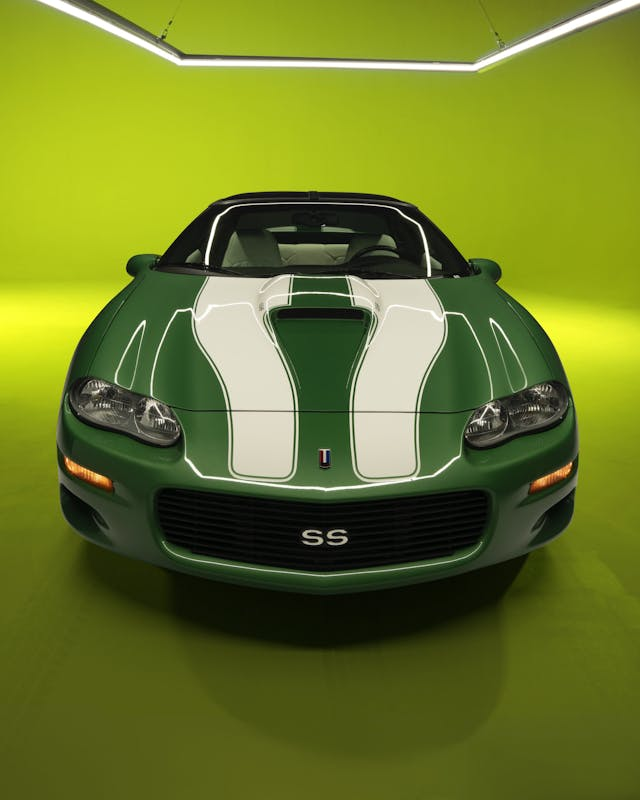

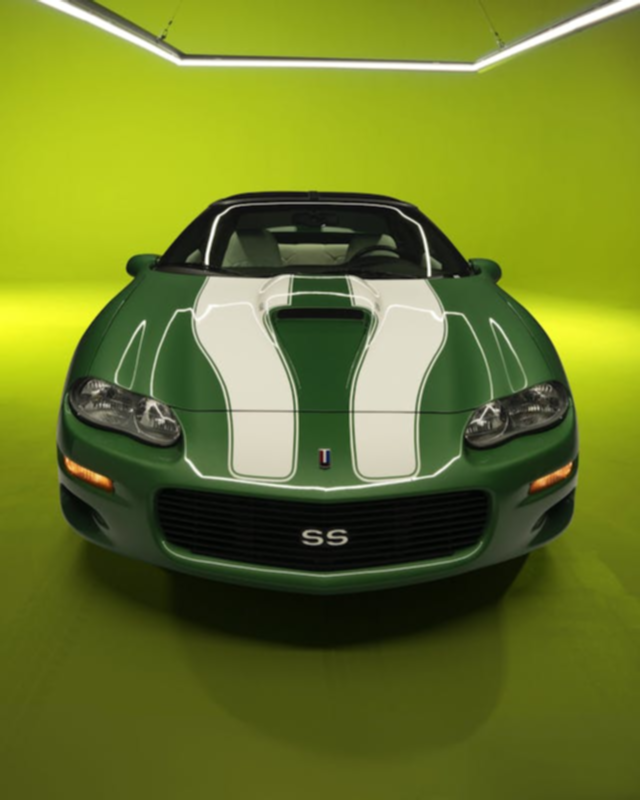

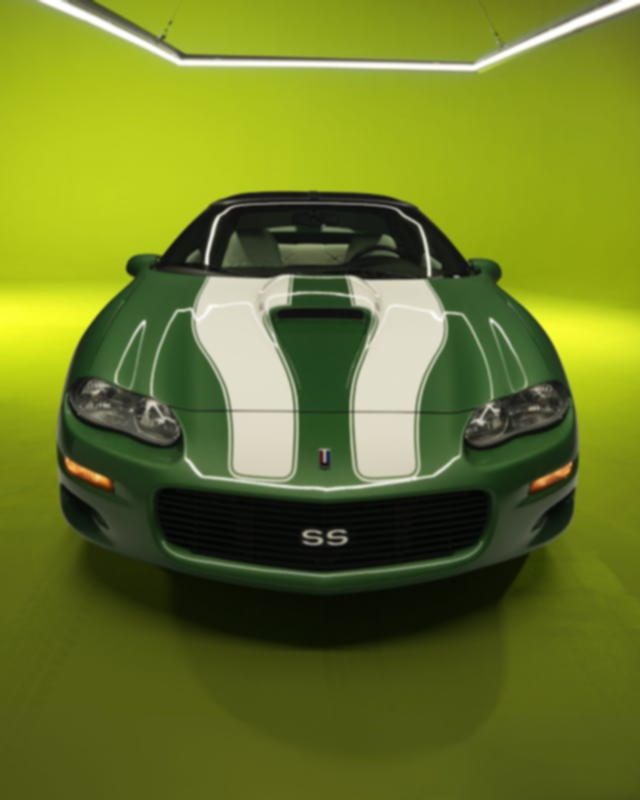

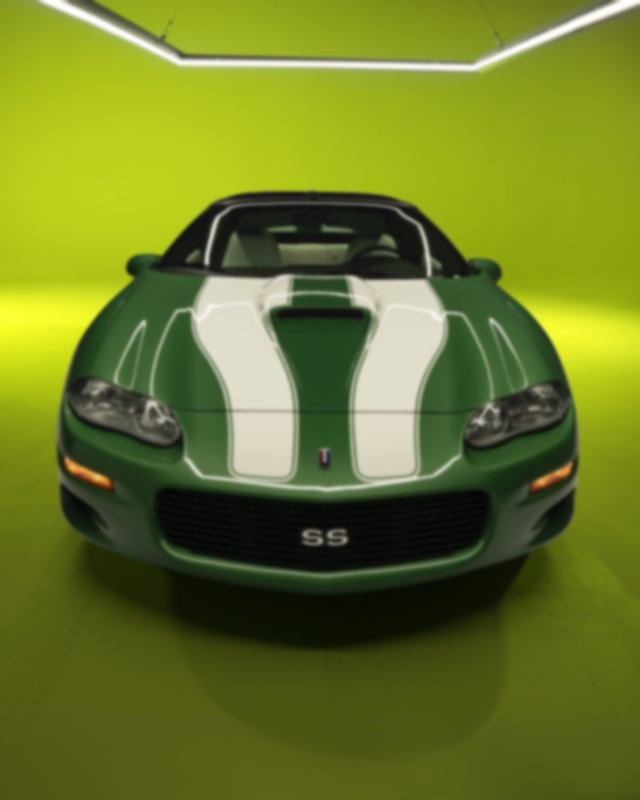

In [16]:
# A possible implementation is here. Modify it play with it:

from skimage import io
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load image
yourUrl = 'https://hagerty-media-prod.imgix.net/2023/11/Shot13_FourthGen_Front_Main_014-1_v2-scaled.jpg?auto=format%2Ccompress&fit=crop&ixlib=php-3.3.0&max-h=800&max-w=640'
image = io.imread(yourUrl)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
   """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.

# Create the Gaussian kernels
kernel_a = gkern(l=3, sig=1)    # σ² = 1,   kernel size: 3x3
kernel_b = gkern(l=5, sig=1.2)  # σ² = 1.2, kernel size: 5x5
kernel_c = gkern(l=9, sig=1.6)  # σ² = 1.6, kernel size: 9x9

# Print the kernels
print("Kernel a (σ² = 1, 3x3):\n", kernel_a)
print("\nKernel b (σ² = 1.2, 5x5):\n", kernel_b)
print("\nKernel c (σ² = 1.6, 9x9):\n", kernel_c)

# Apply Gaussian filtering
filtered_a = cv2.filter2D(image, -1, kernel_a)
filtered_b = cv2.filter2D(image, -1, kernel_b)
filtered_c = cv2.filter2D(image, -1, kernel_c)

# Display results
cv2_imshow(image)  # Original image
cv2_imshow(filtered_a)  # Filtered with kernel_a
cv2_imshow(filtered_b)  # Filtered with kernel_b
cv2_imshow(filtered_c)  # Filtered with kernel_c

4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

As the kernel and sigma size increases, the images begin getting blurrier and removing the details. Compared to the box filter this blurring is more smooth around the edges as the box filter creates abrupt edges, this makes the Gaussian blur look more natural. In both the box filter and the Gaussian filter, the 9x9 kernal creates the largest amount of blur since the larger size of the kernel creates a larger influence over the surrounding pixels in the image.


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



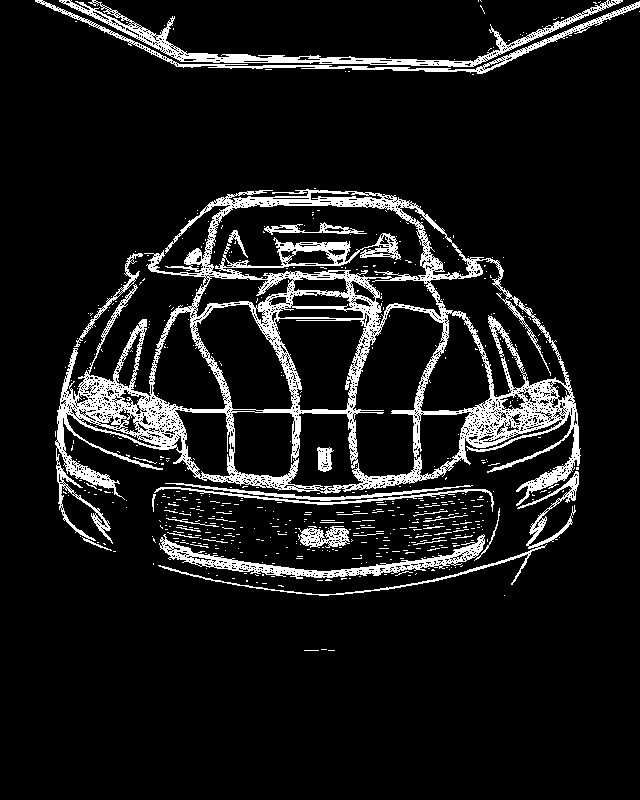

Threshold: 50


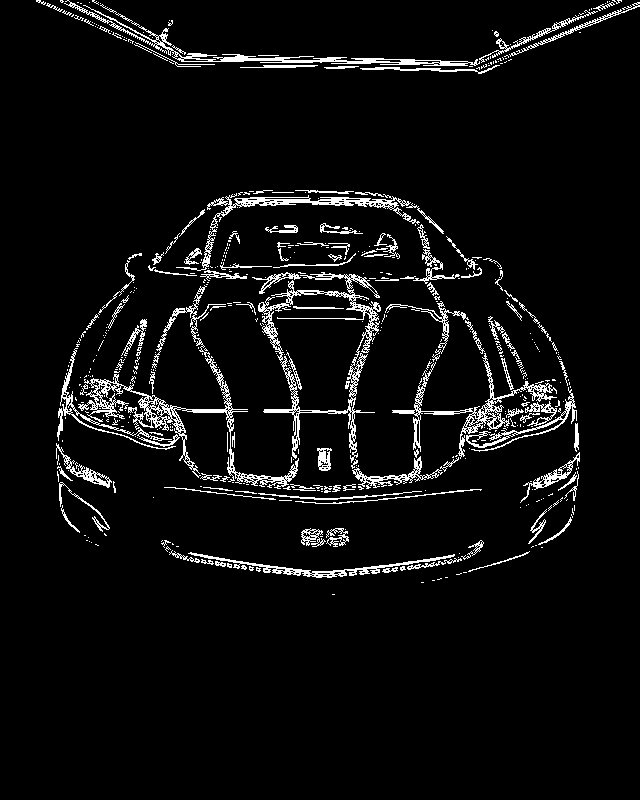

Threshold: 100


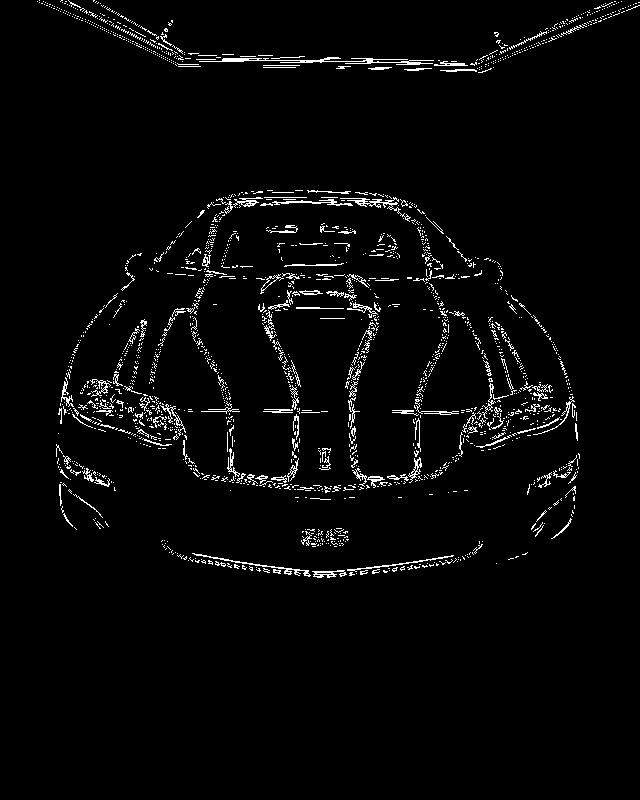

Threshold: 150


In [18]:
# step 1. Get x and y gradients . Use the correct kernels

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # x gradient
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # y gradient

# step 2. Compute the magnitude of the gradient

magnitude = np.sqrt(sobelx**2 + sobely**2)

# Step 3. Threshold. Choose 3 different threshold. visualize outputs

thresholds = [50, 100, 150]
for threshold in thresholds:
    _, thresholded = cv2.threshold(magnitude.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY)
    cv2_imshow(thresholded)  # Display the thresholded image
    print(f"Threshold: {threshold}")

Edit your comments here


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


In [ ]:
# use the canny from openCV
# cv.Canny(	image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]	)


Edit your comments here

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


In [ ]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = io.imread('https://i.stack.imgur.com/pgWt1.jpg')   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# utilize cvtColor to convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the gray scale image
cv2_imshow(gray)

# apply a bilateral filter. Adjust the value to your convenience
diameter_neighborhood= 11
sigma_color_space = 17
sigma_spatial_space = 5
gray = cv2.bilateralFilter(gray, diameter_neighborhood, sigma_color_space, sigma_spatial_space)
cv2_imshow(gray)




8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

In [ ]:
# use the canny from openCV
# threshold1 =
# threshold2 =
#edges = cv2.Canny(	gray, threshold1, threshold2)
cv2_imshow(edges)


9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?  <br>b) What the variable "peri" represents?  <br>c) Change the color of the contour to red

In [ ]:
i=0
cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]


print("A total of " + str(len(cnts)) + " grains were found")
for c in cnts:
	peri = cv2.arcLength(c, True)

  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)
